In [105]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
import sys
import os


sys.path.append(r'C:\Users\pc\Desktop\cs229_ps1\src')


from linear_model import LinearModel
import util


x_train, y_train = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds5_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds5_valid.csv', add_intercept=True)
x_test, y_test = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds5_test.csv', add_intercept=True)

In [107]:
class Locally_Wighted_regression(LinearModel):
    
    def __init__(self, tau):
        self.tau = tau
    def fit(self, x, y):
        
        self.x = x
        self.y = y

    def predict(self, x):
        
        n,m = x.shape

        w_vector = np.exp(- np.linalg.norm(self.x - np.reshape(x, (n, -1, m)), ord=2, axis=2)**2 / (2 * self.tau**2))
        w = np.apply_along_axis(np.diag, axis=1, arr=w_vector)

        theta = np.linalg.inv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y

        return np.einsum('ij,ij->i', x, theta)

In [108]:
model=Locally_Wighted_regression(tau=0.09)
model.fit(x_train,y_train)


In [109]:
def plot(x, y_label, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y_label, 'bx', label='label')
    plt.plot(x[:,-1], y_pred, 'ro', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

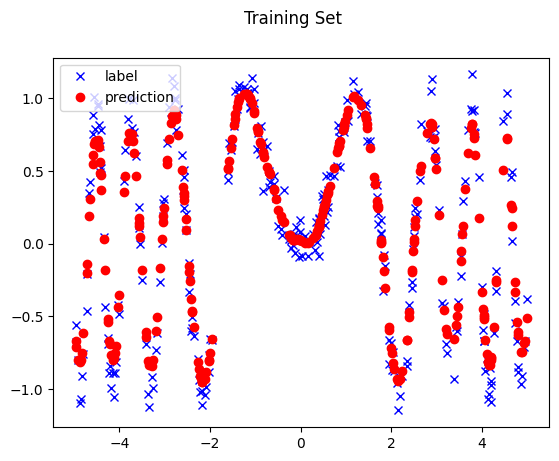

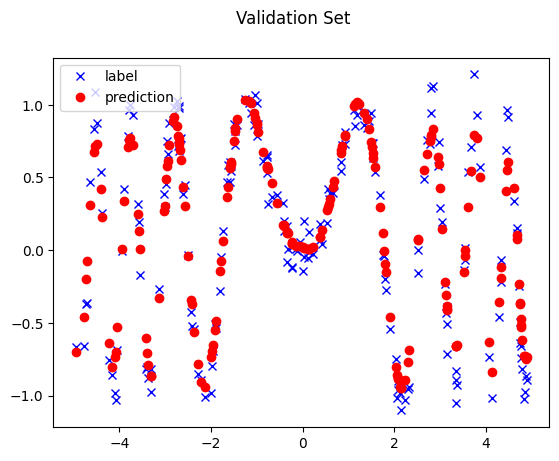

In [110]:
y_train_pred = model.predict(x_train)
plot(x_train, y_train, y_train_pred, 'Training Set')

y_valid_pred = model.predict(x_valid)
plot(x_valid, y_valid, y_valid_pred, 'Validation Set')